<a href="https://colab.research.google.com/github/myra573/MeeraS/blob/main/statistics_advance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 : What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

- When we are rejecting the null hypothesis or failing to reject the null hypothesis, there is possibility of error. Hence we have type 1 and type 2 errors.

Type 1 error is rejection of null hypothesis when its actually true.
eg: an innocent person is convicted.

Type 2 error is failue to rejectg a null hypothesis when its actually false. eg : a guilty person may not be convicted.

The test result may go wrong due to these errors. Also since we are making conclusion based on sample, sample can be biased, hence it is prone to errors.

There can be 4 scenarios:

1. Reject null hypothesis when its actually false
2. Reject null hypothesis when its actually true - type 1 error
3. Retain null hypothesis when actually it is false - type 2 error
4. Retain null hypothesis when actually it is true

Wrong decisions can be made because of type 1 and 2 errors.



Question 2:What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

- p value is the probability value calculated from a statistical test.
- p value in hypothesis testing is used to decide whether to reject a null hypothesis or not

Question 3:Explain the difference between a Z-test and a T-test, including when to use each.

- If standard deviation of population is not given, use T test

-  If standard deviation of population is given and sample size is greater than 30, use Z test. If not greater than 30, use T test.

If population standard deviation is given and sample size is greater than 30 then we use z test otherwise we use t test.

Question 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?

- Point estimate is a single number. Point estimate is located exactly in middle of confidence interval.

Confidence interval is a range of values.

Point estimate +- margin of errors = confidence interval

- In hypothesis testing margin of error is alpha.

- We calculate the upper and lower confidence interval with help of margin of errors. The margin of error significantly influences the width of the confidence interval. A smaller margin of error results in a narrower confidence interval, indicating greater precision and certainty about the estimate. Conversely, a larger margin of error leads to a wider confidence interval, suggesting less certainty and a higher degree of uncertainty in the estimate.

In practical terms, decision-makers often balance between precision (smaller margin of error) and cost (larger sample sizes) when determining the appropriate margin of error for their studies. Understanding the margin of error is crucial for interpreting survey results accurately and making informed decisions based on statistical data.


Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

- ANNOVA is a statistical test or method used to compare the means of two or more groups. Generally ANNOVA is used for more than two groups reason being we can also use t-test for 2 groups.

Using variance you want to determine if the efficiency or performance or if the mean value of 3 or more than 3 groups are same or different.

Assumptions of ANNOVA test:
- Population from which samples are drawn should be normally distributed
- Sample should be independent of each other and should be random
- Absence of outliers
- Homogenity of variance ( variance among groups should be approximately equal)

For more than two variance groups we use analysis of variance with repeated measures.


In [ ]:
# Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest(data, value=100)

#The test statistic for the one sample z-test is 1.5976 and the corresponding p-value is 0.1101. Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.


(np.float64(1.5976240527147705), np.float64(0.1101266701438426))

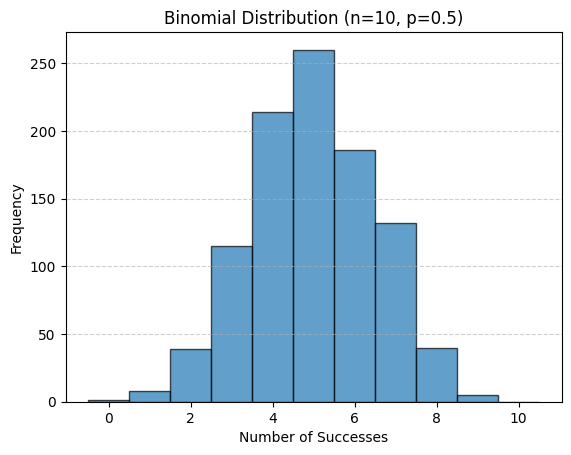

In [ ]:
# Question 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.


import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10       # number of trials
p = 0.5      # probability of success
size = 1000  # number of samples

# Simulate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', alpha=0.7)
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


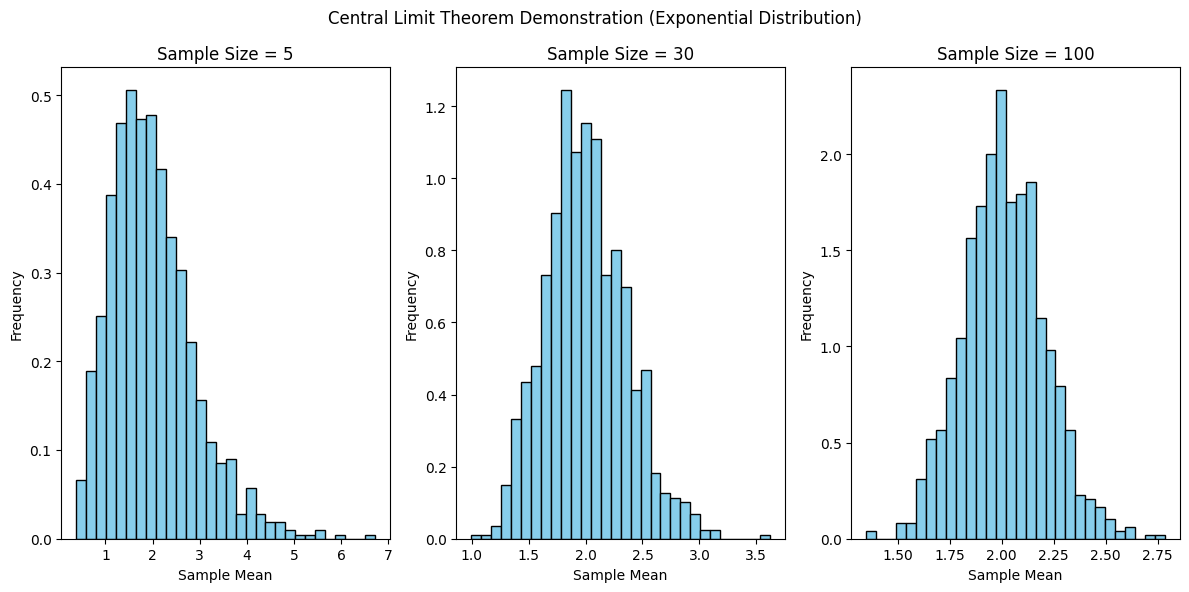

In [ ]:
# Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a non-normal population (Exponential distribution)
np.random.seed(42)
population = np.random.exponential(scale=2.0, size=1_000_000)

# Step 2: Function to draw samples and compute sample means
def sample_means(sample_size, num_samples=1000):
    means = [np.mean(np.random.choice(population, size=sample_size, replace=False))
             for _ in range(num_samples)]
    return means

# Step 3: Compare distributions for different sample sizes
sample_sizes = [5, 30, 100]
plt.figure(figsize=(12, 6))

for i, n in enumerate(sample_sizes, 1):
    means = sample_means(n)
    plt.subplot(1, 3, i)
    plt.hist(means, bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title(f"Sample Size = {n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.suptitle("Central Limit Theorem Demonstration (Exponential Distribution)")
plt.tight_layout()
plt.show()


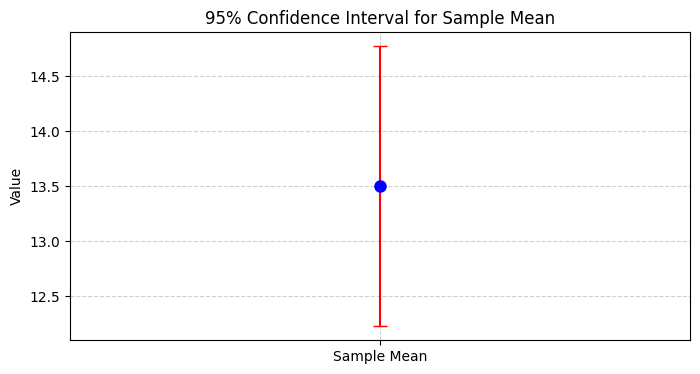

Sample Mean: 13.5000
95% Confidence Interval: (12.2270, 14.7730)


In [ ]:
# Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def confidence_interval(data, confidence=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
        data (list or np.ndarray): Sample data (numeric values).
        confidence (float): Confidence level (default 0.95 for 95%).

    Returns:
        tuple: (mean, lower_bound, upper_bound)
    """
    # Validate input
    if not isinstance(data, (list, np.ndarray)):
        raise TypeError("Data must be a list or numpy array.")
    if len(data) < 2:
        raise ValueError("At least two data points are required.")
    if not (0 < confidence < 1):
        raise ValueError("Confidence level must be between 0 and 1.")

    # Convert to numpy array
    data = np.array(data, dtype=float)

    # Calculate statistics
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    df = len(data) - 1     # Degrees of freedom

    # t-distribution confidence interval
    margin = sem * stats.t.ppf((1 + confidence) / 2, df)
    return mean, mean - margin, mean + margin

def visualize_confidence_interval(data, confidence=0.95):
    """
    Visualize the sample mean and confidence interval.
    """
    mean, lower, upper = confidence_interval(data, confidence)

    plt.figure(figsize=(8, 4))
    plt.errorbar(1, mean, yerr=[[mean - lower], [upper - mean]],
                 fmt='o', color='blue', ecolor='red', capsize=5, markersize=8)
    plt.xticks([1], ['Sample Mean'])
    plt.ylabel('Value')
    plt.title(f'{int(confidence*100)}% Confidence Interval for Sample Mean')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print(f"Sample Mean: {mean:.4f}")
    print(f"{int(confidence*100)}% Confidence Interval: ({lower:.4f}, {upper:.4f})")

# Example usage
if __name__ == "__main__":
    # Example dataset
    sample_data = [12, 15, 14, 10, 13, 15, 14, 16, 12, 14]
    visualize_confidence_interval(sample_data, confidence=0.95)

In [ ]:
# Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

import numpy as np
from scipy.stats import chisquare

# Observed data (e.g., counts of candies by color)
observed = np.array([25, 30, 20, 25])

# Expected data (equal distribution assumption)
expected = np.array([25, 25, 25, 25])

# Perform Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi_stat:.2f}")
print(f"P-value: {p_value:.4f}")


Chi-square Statistic: 2.00
P-value: 0.5724
